# Assignment 2

Testing the difference between a Binomial/Poisson distribution and a Gaussian distribution as you change the parameters of the Binomial/Poisson using: 
    
    1) KS
    
    2) AD
    
    3) KL
    
    4) Pearson's chisq (not done in this example)

In [1]:
%matplotlib inline
from __future__ import print_function, division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.stats

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html#scipy.stats.anderson
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html#scipy.stats.entropy

# AD and KS test

I need to figure out what each test function returns. Let me run them once testing an obvious result: is a Gaussian Gaussian? I know the answer so this is a reality check to make sure I understand the output of the functions (and read the manual at the same time!)

I am testing a normal distribution (Gaussian, mean = 0, std = 1) against a Gaussian model, and a Poisson with small $lambda$, or a binomial _w small np against a Gaussian model_. I expect to find that in the first case the Gaussian is, well, Gaussian and in the second case that the binomial with small np is NOT Gaussian

In [2]:
#generate the distribution
alpha = 0.05
np.random.seed(999)
dist_n = np.random.randn(1000) 
#test ad and ks. those are easy
print ("normal on normal", scipy.stats.kstest(dist_n,'norm'))
print ("normal on normal", scipy.stats.anderson(dist_n, dist='norm'))
print ("") 

normal on normal KstestResult(statistic=0.016344431331899001, pvalue=0.95212890203293565)
normal on normal AndersonResult(statistic=0.26231814126674635, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))



KS: high p-value pvalue>0.05: H0 that sample comes from a Gaussian distribution cannot be rejected

AD: at alpha = 0.05 the statistics = 0.26 is smaller than the 0.784 critical value for $alpha$=0.05 (thresh_0.05 = 0.784): the H0 cannot be rejected.

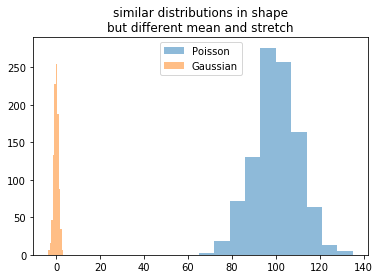

poisson on normal KstestResult(statistic=1.0, pvalue=0.0)
poisson on normal AndersonResult(statistic=0.72428815547573322, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In this case the means are different, so the distributions will be different for KS and AD test. I want a distribution with 'Poisson with high mean' shape cause that is more Gaussianbut I want the mean to be the same as for my Gaussian: mean=0. Similarly, the standard deviation is sqrt(lambda) = sqrt(100). I want it to be 1


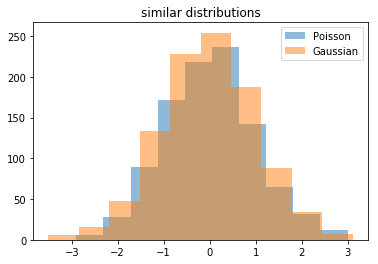

poisson vs normal KstestResult(statistic=0.030537538725986857, pvalue=0.30353169660170898)
poisson vs normal AndersonResult(statistic=0.92641226504883889, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
KS: lower p-value but still rejecting the H0 at alpha=0.05
AD: statistics AD=0.92 larger than threshold (for alpha=0.05) 
thresh_0.05 = 0.784


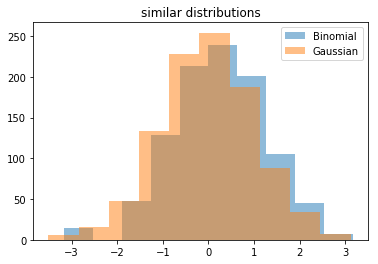

binomial vs normal KstestResult(statistic=0.14200000000000002, pvalue=0.0)
binomial vs normal AndersonResult(statistic=15.852273853456609, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [3]:
np.random.seed(999)
# poisson with 1000 elements, lambda=100 (high)
dist_p = np.random.poisson(100, 1000)
plt.figure()
plt.hist(dist_p, alpha=0.5, label="Poisson")
plt.hist(dist_n, alpha=0.5, label="Gaussian")
plt.legend()
plt.title("similar distributions in shape\nbut different mean and stretch")
plt.show()
print ("poisson on normal", scipy.stats.kstest(dist_p,'norm'))
print ("poisson on normal", scipy.stats.anderson(dist_p, dist='norm'))
print ("\n\nIn this case the means are different, " + 
       "so the distributions will be different for KS and AD test. " + 
       "I want a distribution with 'Poisson with high mean' shape cause that is more Gaussian" + 
       "but I want the mean to be the same as for my Gaussian: mean=0. "
       "Similarly, the standard deviation is sqrt(lambda) = sqrt(100). I want it to be 1") 

dist_p = (np.random.poisson(100, 1000) - 100) * 0.1 #-100 fixes mean, *0.1 fixes stdev
plt.figure()
plt.hist(dist_p, alpha=0.5, label="Poisson")
plt.hist(dist_n, alpha=0.5, label="Gaussian")
plt.legend()
plt.title("similar distributions")
plt.show()

print ("poisson vs normal", scipy.stats.kstest(dist_p,'norm'))
print ("poisson vs normal", scipy.stats.anderson(dist_p, dist='norm'))
print ("KS: lower p-value but still rejecting the H0 at alpha=0.05") 
print ("AD: statistics AD=0.92 larger than threshold (for alpha=0.05) ") 

threshold = scipy.stats.anderson(dist_n, 
                                 dist='norm')[1][scipy.stats.anderson(dist_n, 
                                                                      dist='norm')[2]==[5.0]]
print ("thresh_0.05 =", threshold[0])

n, p = 10, 0.5
dist_b = (np.random.binomial(n, p, 1000) - n*p) / np.sqrt(n*p*(1-p))  #subtract mean divide by stdev
plt.figure()
plt.hist(dist_b, alpha=0.5, label="Binomial")
plt.hist(dist_n, alpha=0.5, label="Gaussian")
plt.legend()
plt.title("similar distributions")
plt.show()
print ("binomial vs normal", scipy.stats.kstest(dist_b,'norm'))
print ("binomial vs normal", scipy.stats.anderson(dist_b, dist='norm'))

### Poisson to Gaussian:

#### KS: Null hypothesis: The Poisson distribution and the Gaussian distribution are identical
## KS: low p-value pvalue<0.05: H0 that sample comes from a Gaussian distribution can be rejected. The Poisson distribution is different from the Gaussian distribution.

#### AD: Null hypothesis: The sample is drawn from Poisson distribution that follows the Gaussian distribution
## AD: at alpha = 0.05 the statistics = 15.85 is larger than the 0.784 critical value for $alpha$=0.05 (thresh_0.05 = 0.784): the H0 can be rejected. The Poisson distribution is different from the Gaussian distribution.

### KL DIVERGENCE

In [4]:
# np.histogram returns the value of the histogram (y) and the edges of the bins (x). 
# Notice: the edges, not the centers
distpdf_n, mybins_n, = np.histogram(dist_n, density=True)
distpdf_b, mybins_b, = np.histogram(dist_b, density=True)
distpdf_p, mybins_p, = np.histogram(dist_p, density=True)

#get the bin centers
bincenters_n = mybins_n[:-1] + 0.5*(mybins_n[1] - mybins_n[0])
bincenters_b = mybins_b[:-1] + 0.5*(mybins_b[1] - mybins_b[0])
bincenters_p = mybins_p[:-1] + 0.5*(mybins_p[1] - mybins_p[0])

print ('the KL test returns the "entropy". ' + 
       "To figure out what the number means thoug in terms of NULL rejection, help yourself " + 
       "with the fact that you know what the result should be for these three distributions!")
print ("normal on normal", 
    scipy.stats.entropy(distpdf_n, 
                            scipy.stats.norm.pdf(bincenters_n)) )
print ("poisson on normal", 
       scipy.stats.entropy(distpdf_p, 
                                scipy.stats.norm.pdf(bincenters_p)))
print ("binomial on normal", 
       scipy.stats.entropy(distpdf_b, 
                                scipy.stats.norm.pdf(bincenters_p)))

the KL test returns the "entropy". To figure out what the number means thoug in terms of NULL rejection, help yourself with the fact that you know what the result should be for these three distributions!
normal on normal 0.00527211066212
poisson on normal 0.00523311596851
binomial on normal 0.0690986635223


# 1. BINOMIAL

## Null hypothesis:
### KS: The Binomial distribution and the Gaussian distribution are identical
### AD: The sample is drawn from Binomial distribution that follows the Gaussian distribution
### KL: No information gets lost when using the Binomial distribution to approximate the Gaussian distribution
### Chisq: The frequency distribution of Binomial observed in a sample is consistent with the Gaussian distribution

In [5]:
narray = range(1,500,10)
ks_p_b = np.zeros(len(narray)) # the returned p-value
ks_s_b = np.zeros(len(narray)) # the value of the statistics
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi_s_b = np.zeros(len(narray))
chi_p_b = np.zeros(len(narray))

In [6]:
narray = range(1,500,10)

In [7]:
np.random.seed(999)

#loop over the different values of n (or n and p)
for i,n in enumerate(narray):
    p = 0.5    #parameter for the binomial, my arbitrary choice
    dist = (np.random.binomial(n, p, 1000) - n * p ) / np.sqrt(n * p * (1-p))   #generate the distribution
    #run the tests. 
    ks_s_b[i] = scipy.stats.kstest(dist,'norm')[0]
    ks_p_b[i] = scipy.stats.kstest(dist,'norm')[1]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
  
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist), max(dist), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])
    
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins, normed=True)[0], 
                                    scipy.stats.norm.pdf(bincenters))
    chi_s_b[i] = scipy.stats.chisquare(np.histogram(dist, bins=mybins, normed=True)[0], 
                                    scipy.stats.norm.pdf(bincenters))[0]
    chi_p_b[i] = scipy.stats.chisquare(np.histogram(dist, bins=mybins, normed=True)[0], 
                                    scipy.stats.norm.pdf(bincenters))[1]

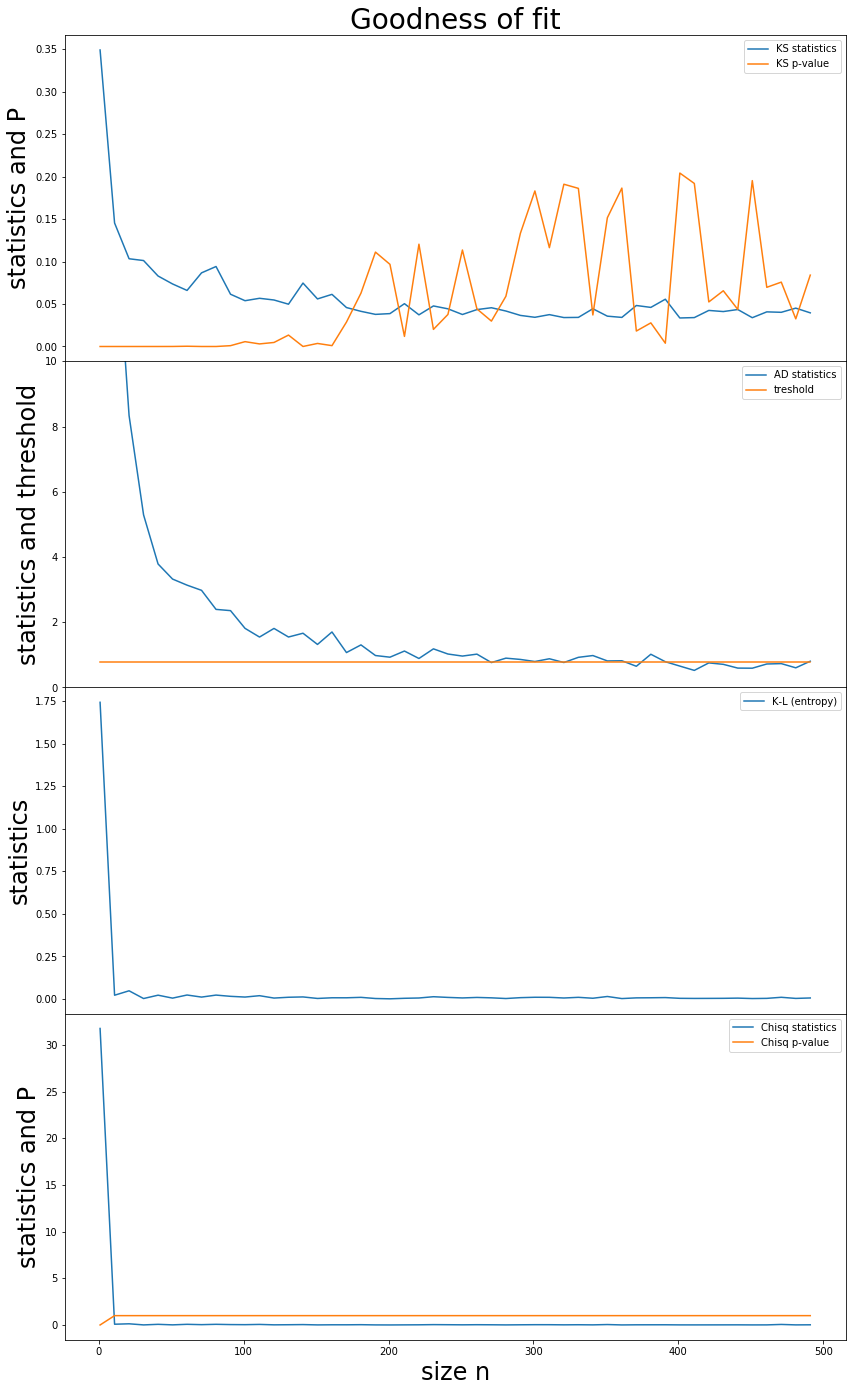

In [8]:
# Four subplots sharing x axes
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, figsize = (14,24))
ax1.plot(narray, ks_s_b, label='KS statistics')
ax1.plot(narray, ks_p_b, label='KS p-value')
ax1.set_title('Goodness of fit', fontsize=28)
ax1.set_ylabel('statistics and P', fontsize=24)
ax1.legend()

ax2.plot(narray, ad_b,  label='AD statistics')
ax2.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
ax2.set_ylim(0,10)
ax2.set_ylabel('statistics and threshold', fontsize=24)
ax2.legend()

ax3.plot(narray, kl_b, label='K-L (entropy)')
ax3.set_ylabel('statistics', fontsize=24)
ax3.legend()

ax4.plot(narray, chi_s_b, label='Chisq statistics')
ax4.plot(narray, chi_p_b, label='Chisq p-value')
ax4.set_ylabel('statistics and P', fontsize=24)
ax4.legend()

plt.xlabel('size n', fontsize=24)
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

plt.show()

### Figure 2. The outcome of fitting into the Gaussian distribution changes as the parameter of the sample Binomial distribution changes in four goodness of fit tests.
Four tests are KS, AD, K-L, and Pearson's chisq. The first graph is __KS test__: P-value gets larger from 0 when sample size n gets larger, and KS statistics gets smaller. Generally, it gets harder to reject the Null hypothesis, meaning the Binomial distribution and the Gaussian distribution are identical when n is large. The second graph is __AD test__: AD statistics gets smaller to the threshold when sample size n gets larger. Generally, it gets harder to reject the Null hypothesis, meaning The sample is drawn from Binomial distribution that follows the Gaussian distribution. The third graph is __K-L test__: K-L statistics gets smaller when sample size n gets larger. Generally, less information gets lost in this Gaussian approximation. The fourth graph is __Pearson's chisq test__: chisq P-value gets larger from 0 when sample size n gets larger, and Chisq statistics gets smaller. Generally, it gets harder to reject the Null hypothesis, meaning the frequency distribution of Binomial observed in a sample is consistent with the Gaussian distribution.

# 2. POISSON

## Null hypothesis:
### KS: The Poisson distribution and the Gaussian distribution are identical
### AD: The sample is drawn from Poisson distribution that follows the Gaussian distribution
### KL: No information gets lost when using the Poisson distribution to approximate the Gaussian distribution
### Chisq: The frequency distribution of Poisson observed in a sample is consistent with the Gaussian distribution

In [9]:
narray = range(1,500,10)
ks_p_b = np.zeros(len(narray))
ks_s_b = np.zeros(len(narray)) 
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi_s_b = np.zeros(len(narray))
chi_p_b = np.zeros(len(narray))

for i,n in enumerate(narray):
    dist = (np.random.poisson(n, 1000) - n ) / np.sqrt(n)
    ks_s_b[i] = scipy.stats.kstest(dist,'norm')[0]
    ks_p_b[i] = scipy.stats.kstest(dist,'norm')[1]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]

    mybins=np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], 
                                    scipy.stats.norm.pdf(bincenters)+n)
    chi_s_b[i] = scipy.stats.chisquare(np.histogram(dist, bins=mybins, normed=True)[0], 
                                    scipy.stats.norm.pdf(bincenters))[0]
    chi_p_b[i] = scipy.stats.chisquare(np.histogram(dist, bins=mybins, normed=True)[0], 
                                    scipy.stats.norm.pdf(bincenters))[1] 

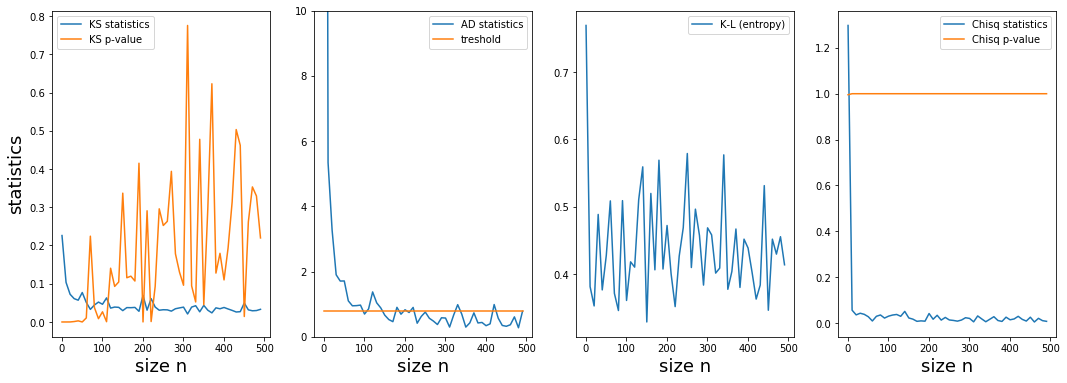

In [10]:
fig = plt.figure(figsize = (18,6))
fig.add_subplot(141)
plt.plot(narray, ks_s_b, label='KS statistics')
plt.plot(narray, ks_p_b, label='KS p-value')
plt.xlabel('size n', fontsize=18)
plt.ylabel('statistics', fontsize=18)
plt.legend()

fig.add_subplot(142)
plt.plot(narray, ad_b,  label='AD statistics')
plt.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
plt.ylim(0,10) #limit the y range or you cannot see the relevant part
plt.xlabel('size n', fontsize=18)
plt.legend()

fig.add_subplot(143)
plt.plot(narray, kl_b, label='K-L (entropy)')
plt.xlabel('size n', fontsize=18)
plt.legend()

fig.add_subplot(144)
plt.plot(narray, chi_s_b, label='Chisq statistics')
plt.plot(narray, chi_p_b, label='Chisq p-value')
plt.xlabel('size n', fontsize=18)
plt.legend()

### Figure 3. The outcome of fitting into the Gaussian distribution changes as the parameter of the sample Poisson distribution changes in four goodness of fit tests.
Four tests are KS, AD, K-L, and Pearson's chisq. The first graph is __KS test__: P-value gets larger from 0 when sample size n gets larger, and KS statistics gets smaller. Generally, it gets harder to reject the Null hypothesis, meaning the Poisson distribution and the Gaussian distribution are identical when n is large. The second graph is __AD test__: AD statistics gets smaller to the threshold when sample size n gets larger. Generally, it gets harder to reject the Null hypothesis, meaning The sample is drawn from Poisson distribution that follows the Gaussian distribution. The third graph is __K-L test__: K-L statistics gets smaller when sample size n gets larger. Generally, less information gets lost in this Gaussian approximation. The fourth graph is __Pearson's chisq test__: chisq P-value gets larger from 0 when sample size n gets larger, and Chisq statistics gets smaller. Generally, it gets harder to reject the Null hypothesis, meaning the frequency distribution of Poisson observed in a sample is consistent with the Gaussian distribution.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


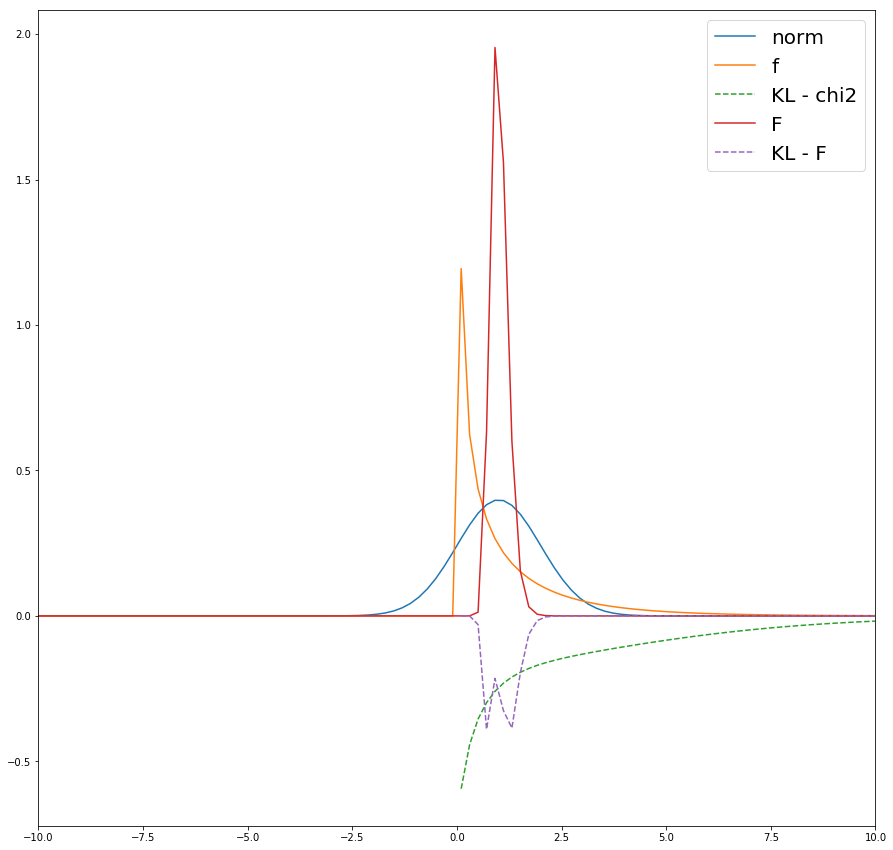

In [11]:
plt.figure(figsize=(15,15))

q = lambda x, mu : scipy.stats.distributions.norm.pdf(x - mu)
c = lambda x, mu : scipy.stats.distributions.chi2.pdf(x, df=mu)
f = lambda x, mu : scipy.stats.distributions.f.pdf(x,100,100)

Dkl = lambda x ,mu, p :  p(x, mu) * np.log10(q(x, mu)) + p(x, mu) * np.log10(p(x, mu))

def model(x) : 
    #gaussian model from scratch
    return 1. / (s * np.sqrt(2 * np.pi)) * np.exp(- ((x - m)**2 / 2. / s**2))

x = np.linspace(-10,10,100)
plt.plot(x, q(x, 1), label='norm')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, p))

plt.plot(x, c(x,1), label='f')
plt.plot(x,Dkl(x, 1, c), '--', label = 'KL - chi2')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, c))

plt.plot(x, f(x,1), label='F')
plt.plot(x, Dkl(x, 1, f), '--', label = 'KL - F')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, f))
bins = np.arange(0, 99, 10)

plt.xlim(-10, 10)
plt.legend(fontsize = 20);